<a href="https://colab.research.google.com/github/Jeanmmuniz/demorepo/blob/main/Credit_Risk_Group_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pyarrow.feather as feather

In [ ]:
# this step is to read data on Google Drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
# Import MERGED_DATA
merged_data=pd.read_csv("/content/drive/MyDrive/merged_data.csv")

In [ ]:
merged_data.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-03-24,0.656398,0.000982,0.020915,1.003195,0.005000,0.153319,0.005840,...,NaN,NaN,NaN,0.001953,0.009531,0.008371,NaN,0.004612,0.007814,0.005242
1,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-04-30,0.615803,0.008412,0.013995,1.005670,0.002053,0.144023,0.009487,...,NaN,NaN,NaN,0.009258,0.004578,0.004781,NaN,0.005479,0.009486,0.003201
2,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-05-06,0.618878,0.006465,0.028050,1.009657,0.002975,0.140481,0.007167,...,NaN,NaN,NaN,0.008910,0.002681,0.007930,NaN,0.003842,0.001583,0.007400
3,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-06-12,0.657263,0.002786,0.011857,1.008340,0.005694,0.086738,0.009429,...,NaN,NaN,NaN,0.004100,0.003009,0.008959,NaN,0.006080,0.004069,0.001708
4,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-07-10,0.659899,0.001155,0.086224,1.004588,0.002908,0.095688,0.000962,...,NaN,NaN,NaN,0.002885,0.009691,0.007086,NaN,0.002817,0.006200,0.009302


In [ ]:
start_with_S = sum(col.startswith('S_') for col in merged_data.columns)
start_with_D = sum(col.startswith('D_') for col in merged_data.columns)
start_with_B = sum(col.startswith('B_') for col in merged_data.columns)
start_with_P = sum(col.startswith('P_') for col in merged_data.columns)
start_with_R = sum(col.startswith('R_') for col in merged_data.columns)

start_with_R

28

In [ ]:
#filter column target with value 1 for default
filtered_data = merged_data[merged_data['target'] == 1]
filtered_data

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-03-24,0.656398,0.000982,0.020915,1.003195,0.005000,0.153319,0.005840,...,NaN,NaN,NaN,0.001953,0.009531,0.008371,NaN,0.004612,0.007814,0.005242
1,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-04-30,0.615803,0.008412,0.013995,1.005670,0.002053,0.144023,0.009487,...,NaN,NaN,NaN,0.009258,0.004578,0.004781,NaN,0.005479,0.009486,0.003201
2,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-05-06,0.618878,0.006465,0.028050,1.009657,0.002975,0.140481,0.007167,...,NaN,NaN,NaN,0.008910,0.002681,0.007930,NaN,0.003842,0.001583,0.007400
3,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-06-12,0.657263,0.002786,0.011857,1.008340,0.005694,0.086738,0.009429,...,NaN,NaN,NaN,0.004100,0.003009,0.008959,NaN,0.006080,0.004069,0.001708
4,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-07-10,0.659899,0.001155,0.086224,1.004588,0.002908,0.095688,0.000962,...,NaN,NaN,NaN,0.002885,0.009691,0.007086,NaN,0.002817,0.006200,0.009302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106815,846a5f013e45767c6747534d1da0a8d485e3ab3e4857ed...,1,2017-11-03,0.198736,0.211295,0.096968,0.313200,0.003278,0.060222,0.407048,...,NaN,NaN,NaN,0.009533,0.004548,0.008364,NaN,0.001289,0.007957,0.003520
1106816,846a5f013e45767c6747534d1da0a8d485e3ab3e4857ed...,1,2017-12-28,0.219300,0.036308,0.089765,0.095969,0.005256,0.121843,0.189900,...,NaN,NaN,NaN,0.009117,0.001159,0.001093,NaN,0.002517,0.004826,0.008273
1106817,846a5f013e45767c6747534d1da0a8d485e3ab3e4857ed...,1,2018-01-27,0.210153,0.913983,0.087066,0.096471,0.005559,0.128011,0.189705,...,NaN,NaN,NaN,0.003217,0.005673,0.002084,NaN,0.008348,0.001999,0.001203
1106818,846a5f013e45767c6747534d1da0a8d485e3ab3e4857ed...,1,2018-02-10,0.180408,0.006312,0.087152,0.008491,0.002155,0.134200,0.686326,...,NaN,NaN,NaN,0.002421,0.000177,0.003786,NaN,0.002432,0.002470,0.002568


In [ ]:
#shape
merged_data.shape

(1106833, 191)

In [ ]:
column_data_types = merged_data.dtypes
column_data_types

customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object

In [ ]:
merged_data.head()




,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-03-24,0.656398,0.000982,0.020915,1.003195,0.005000,0.153319,0.005840,...,NaN,NaN,NaN,0.001953,0.009531,0.008371,NaN,0.004612,0.007814,0.005242
1,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-04-30,0.615803,0.008412,0.013995,1.005670,0.002053,0.144023,0.009487,...,NaN,NaN,NaN,0.009258,0.004578,0.004781,NaN,0.005479,0.009486,0.003201
2,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-05-06,0.618878,0.006465,0.028050,1.009657,0.002975,0.140481,0.007167,...,NaN,NaN,NaN,0.008910,0.002681,0.007930,NaN,0.003842,0.001583,0.007400
3,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-06-12,0.657263,0.002786,0.011857,1.008340,0.005694,0.086738,0.009429,...,NaN,NaN,NaN,0.004100,0.003009,0.008959,NaN,0.006080,0.004069,0.001708
4,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-07-10,0.659899,0.001155,0.086224,1.004588,0.002908,0.095688,0.000962,...,NaN,NaN,NaN,0.002885,0.009691,0.007086,NaN,0.002817,0.006200,0.009302


In [ ]:
#Find columns with object datatypes
mask = ~(column_data_types == 'int64') & ~(column_data_types == 'float64')
filtered_mask = merged_data.loc[:, mask]
filtered_mask

,customer_ID,S_2,D_63,D_64
0,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,2017-03-24,CR,U
1,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,2017-04-30,CR,U
2,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,2017-05-06,CR,U
3,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,2017-06-12,CR,U
4,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,2017-07-10,CR,U
...,...,...,...,...
1106828,7fc0648bacd47a505abac8b80ec6cb4e69e2ec801fe5ba...,2017-11-16,CO,U
1106829,7fc0648bacd47a505abac8b80ec6cb4e69e2ec801fe5ba...,2017-12-18,CO,U
1106830,7fc0648bacd47a505abac8b80ec6cb4e69e2ec801fe5ba...,2018-01-13,CO,U
1106831,7fc0648bacd47a505abac8b80ec6cb4e69e2ec801fe5ba...,2018-02-09,CO,U


In [ ]:
#print the distinct values in D_63 and D_64
distinct_values_d_63 = merged_data['D_63'].unique()
distinct_values_d_64 = merged_data['D_64'].unique()


In [ ]:
#Filtered merged data to time for 6 months

# Convert the 'date_column' to a datetime format
merged_data['S_2'] = pd.to_datetime(merged_data['S_2'])

# Verify the data type of the 'date_column'
print(merged_data['S_2'].dtype)

datetime64[ns]


In [ ]:
#Filtered merged data to time for 6 months
###Use to change Date

from datetime import datetime
# Define the start date (April 2017)
start_date = datetime(2017, 11, 1)

# Get the current date
end_date = datetime(2018, 4, 30)

# Create a mask to filter dates within the specified range
date_mask = (merged_data['S_2'] >= start_date) & (merged_data['S_2'] <= end_date)

# Apply the mask and group by 'customer_ID'
filtered_df = merged_data[date_mask].groupby('customer_ID')

In [ ]:
filtered_df

In [ ]:
merged_data.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-03-24,0.656398,0.000982,0.020915,1.003195,0.005000,0.153319,0.005840,...,NaN,NaN,NaN,0.001953,0.009531,0.008371,NaN,0.004612,0.007814,0.005242
1,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-04-30,0.615803,0.008412,0.013995,1.005670,0.002053,0.144023,0.009487,...,NaN,NaN,NaN,0.009258,0.004578,0.004781,NaN,0.005479,0.009486,0.003201
2,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-05-06,0.618878,0.006465,0.028050,1.009657,0.002975,0.140481,0.007167,...,NaN,NaN,NaN,0.008910,0.002681,0.007930,NaN,0.003842,0.001583,0.007400
3,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-06-12,0.657263,0.002786,0.011857,1.008340,0.005694,0.086738,0.009429,...,NaN,NaN,NaN,0.004100,0.003009,0.008959,NaN,0.006080,0.004069,0.001708
4,56027dbfd9b626629fb110af8d2da896dd458b0083ed07...,1,2017-07-10,0.659899,0.001155,0.086224,1.004588,0.002908,0.095688,0.000962,...,NaN,NaN,NaN,0.002885,0.009691,0.007086,NaN,0.002817,0.006200,0.009302


In [ ]:
distinct_values_d_63


array(['CR', 'CO', 'CL', 'XZ', 'XL', 'XM'], dtype=object)

In [ ]:
distinct_values_d_64

array(['U', 'O', nan, 'R', '-1'], dtype=object)

In [ ]:
merged_data["D_120"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1106828    0.0
1106829    0.0
1106830    0.0
1106831    0.0
1106832    0.0
Name: D_120, Length: 1106833, dtype: float64

#One-Hot encoding below

In [ ]:
#One hot encoding D-64
print (merged_data.groupby(["D_64"]).size())

# one-hot encoding
one_hot = pd.get_dummies(merged_data['D_64'])
print (one_hot.head(10))
merged_data = merged_data.join(one_hot)

D_64
-1      7119
O     583808
R     167170
U     305243
dtype: int64
   -1  O  R  U
0   0  0  0  1
1   0  0  0  1
2   0  0  0  1
3   0  0  0  1
4   0  0  0  1
5   0  1  0  0
6   0  1  0  0
7   0  1  0  0
8   0  1  0  0
9   0  1  0  0


In [ ]:
# and we remove the original attribute
merged_data.drop(['D_64'], axis=1, inplace=True)

In [ ]:
merged_data.shape

(1106833, 194)

In [ ]:
#One hot encoding D-63
print (merged_data.groupby(["D_63"]).size())

# one-hot encoding
one_hot = pd.get_dummies(merged_data['D_63'])
print (one_hot.head(10))
merged_data = merged_data.join(one_hot)

D_63
CL     87507
CO    822465
CR    188361
XL      1387
XM      2020
XZ      5093
dtype: int64
   CL  CO  CR  XL  XM  XZ
0   0   0   1   0   0   0
1   0   0   1   0   0   0
2   0   0   1   0   0   0
3   0   0   1   0   0   0
4   0   0   1   0   0   0
5   0   0   1   0   0   0
6   0   0   1   0   0   0
7   0   0   1   0   0   0
8   0   0   1   0   0   0
9   0   0   1   0   0   0


In [ ]:
# and we remove the original attribute
merged_data.drop(['D_63'], axis=1, inplace=True)

In [ ]:
merged_data.shape

(1106833, 199)

In [ ]:
#feature definition
features = merged_data.drop(['customer_ID', 'S_2'], axis=1).columns.to_list()
cat_cols=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_features = [x for x in features if x not in cat_cols]

In [ ]:
#feature definition. new columns created. it contains children-set of target variables also which is not useful. we can drop it
###feature_cols=merged_data.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last'])
###feature_cols.columns = ['_'.join(x) for x in feature_cols.columns]

In [ ]:
feature_cols_mean=merged_data.groupby("customer_ID")[num_features].agg(['mean'])
feature_cols_mean.columns = ['_'.join(x) for x in feature_cols_mean.columns]


In [ ]:
feature_cols_mean.head()

,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,-1_mean,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.0,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,NaN,...,0.0,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,NaN,...,0.0,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1.0,0.406705,0.124733,0.938564,0.025402,0.006254,0.159538,0.005921,1.169219,NaN,...,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,1.0,0.386107,0.117855,0.862294,0.023567,0.274521,0.820201,0.005433,0.749541,NaN,...,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
00057c2d8d887fa3f777d97dc939700731575772e6c99025aaa0ab56870353ce,0.0,0.985209,0.006420,0.006033,0.814712,0.004003,NaN,0.005078,0.005713,0.012342,...,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

#Step 6 train test split

In [ ]:
#step6. train-test split
train, test= train_test_split(feature_cols_mean,test_size=0.3)

In [ ]:
#neural test-train split
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [ ]:
# check
print (train.shape)
print (test.shape)

(64248, 188)
(27535, 188)


In [ ]:
test_1, test_2= train_test_split(test,test_size=0.5)

In [ ]:
# check
print (test_1.shape)
print (test_2.shape)

(13767, 188)
(13768, 188)


In [ ]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different.
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(train["target_mean"])/len(train["target_mean"]))
print (sum(test_1["target_mean"])/len(test_1["target_mean"]))
print (sum(test_2["target_mean"])/len(test_2["target_mean"]))

0.25910534180052297
0.25633761894385126
0.25515688553166765


In [ ]:
# Define X and Y varibales to build the ensemble model.
X_train = train.drop(['target_mean'], axis = 1)
Y_train = train['target_mean']

X_test_1 = test_1.drop(['target_mean'], axis = 1)
Y_test_1 = test_1['target_mean']

X_test_2 = test_2.drop(['target_mean'], axis = 1)
Y_test_2 = test_2['target_mean']

#Step 8 Below

In [ ]:
# Build a simple XGB model to find important features

import xgboost as xgb
xgb_instance = xgb.XGBClassifier(n_estimators = 20)
model_for_feature_selection = xgb_instance.fit(X_train, Y_train)

In [ ]:
# check feature importances - you can also use SHAP values
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
print (feature_importance.to_string())

        Feature  Importance
0      P_2_mean    0.345266
62    B_22_mean    0.041262
4      R_1_mean    0.028753
3      B_2_mean    0.025662
2      B_1_mean    0.023428
10    D_44_mean    0.022941
24     B_9_mean    0.022844
31    B_11_mean    0.021708
8     D_42_mean    0.014600
51    D_65_mean    0.011162
27     P_3_mean    0.010815
5      S_3_mean    0.009909
20     B_7_mean    0.009021
14     R_2_mean    0.008096
124   S_23_mean    0.008038
53    B_17_mean    0.007608
15    D_46_mean    0.007216
12    D_45_mean    0.007153
21     B_8_mean    0.007073
13     B_5_mean    0.006998
23    D_51_mean    0.006323
18    D_49_mean    0.006252
22    D_50_mean    0.006020
140  D_110_mean    0.005985
9     D_43_mean    0.005851
25     R_3_mean    0.005294
58     R_6_mean    0.005258
1     D_39_mean    0.004960
141  D_111_mean    0.004858
137   R_27_mean    0.004850
85    R_11_mean    0.004732
126   S_25_mean    0.004594
11     B_4_mean    0.004395
66    S_15_mean    0.004227
39    D_56_mean    0

In [ ]:
feature_importance.to_csv(r'/content/drive/MyDrive/feature_importance.csv', index=False)

In [ ]:
# choose features with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X_train = X_train[final_features]
X_test_1 = X_test_1[final_features]
X_test_2 = X_test_2[final_features]

In [ ]:
#slide2
import pandas as pd

# Initialize a dictionary to store the counts for each number of rows
row_counts = {}

# Iterate from 12 rows down to 1 row
for row_count in range(13, 0, -1):
    # Filter the groups where the count is equal to row_count
    customers_with_row_count = merged_data.groupby('customer_ID').size()
    customers_with_row_count = customers_with_row_count[customers_with_row_count == row_count]

    # Store the count in the dictionary
    row_counts[row_count] = len(customers_with_row_count)

# Print the counts for each number of rows
for row_count, count in row_counts.items():
    print(f"Number of customers with {row_count} rows of data: {count}")


Number of customers with 13 rows of data: 77234
Number of customers with 12 rows of data: 2082
Number of customers with 11 rows of data: 1234
Number of customers with 10 rows of data: 1306
Number of customers with 9 rows of data: 1328
Number of customers with 8 rows of data: 1277
Number of customers with 7 rows of data: 1036
Number of customers with 6 rows of data: 1112
Number of customers with 5 rows of data: 920
Number of customers with 4 rows of data: 922
Number of customers with 3 rows of data: 1122
Number of customers with 2 rows of data: 1217
Number of customers with 1 rows of data: 993


In [ ]:
#slide 2
import pandas as pd

# Assuming 'merged_data' is your DataFrame
# 'customer_id' is the column that uniquely identifies customers
# 'target_column' is the name of the column that contains the default status (0 or 1)

# Initialize a dictionary to store the counts for each number of rows and each unique target value
row_and_target_counts = {}

# Iterate from 13 rows down to 1 row
for row_count in range(13, 0, -1):
    # Filter the groups where the count is equal to row_count
    customers_with_row_count = merged_data.groupby('customer_ID').size()
    customers_with_row_count = customers_with_row_count[customers_with_row_count == row_count]

    # Calculate counts for each unique target value within the filtered groups
    for target_value in [0, 1]:
        target_count = merged_data[merged_data['customer_ID'].isin(customers_with_row_count.index)]['target'].value_counts().get(target_value, 0)

        # Store the count in the dictionary
        row_and_target_counts[(row_count, target_value)] = target_count

# Print the counts for each number of rows and each unique target value
for (row_count, target_value), count in row_and_target_counts.items():
    print(f"Number of customers with {row_count} rows of data and target value {target_value}: {count/row_count}")

Number of customers with 13 rows of data and target value 0: 59366.0
Number of customers with 13 rows of data and target value 1: 17868.0
Number of customers with 12 rows of data and target value 0: 1280.0
Number of customers with 12 rows of data and target value 1: 802.0
Number of customers with 11 rows of data and target value 0: 691.0
Number of customers with 11 rows of data and target value 1: 543.0
Number of customers with 10 rows of data and target value 0: 682.0
Number of customers with 10 rows of data and target value 1: 624.0
Number of customers with 9 rows of data and target value 0: 728.0
Number of customers with 9 rows of data and target value 1: 600.0
Number of customers with 8 rows of data and target value 0: 715.0
Number of customers with 8 rows of data and target value 1: 562.0
Number of customers with 7 rows of data and target value 0: 617.0
Number of customers with 7 rows of data and target value 1: 419.0
Number of customers with 6 rows of data and target value 0: 717

In [ ]:
# check
print (X_train.shape)
print (X_test_1.shape)
print (X_test_2.shape)

(64248, 27)
(13767, 27)
(13768, 27)


#Step 9 below

In [ ]:
#step 9
xgb_instance_advanced = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, min_child_weight=5)
model_advanced = xgb_instance_advanced.fit(X_train, Y_train)

In [ ]:
# check feature importances - you can also use SHAP values
feature_importance2 = {'Feature':X_train.columns,'Importance':model_advanced.feature_importances_}
feature_importance2 = pd.DataFrame(feature_importance)
feature_importance2.sort_values("Importance", inplace=True,ascending=False)
print (feature_importance2.to_string())

        Feature  Importance
0      P_2_mean    0.345266
62    B_22_mean    0.041262
4      R_1_mean    0.028753
3      B_2_mean    0.025662
2      B_1_mean    0.023428
10    D_44_mean    0.022941
24     B_9_mean    0.022844
31    B_11_mean    0.021708
8     D_42_mean    0.014600
51    D_65_mean    0.011162
27     P_3_mean    0.010815
5      S_3_mean    0.009909
20     B_7_mean    0.009021
14     R_2_mean    0.008096
124   S_23_mean    0.008038
53    B_17_mean    0.007608
15    D_46_mean    0.007216
12    D_45_mean    0.007153
21     B_8_mean    0.007073
13     B_5_mean    0.006998
23    D_51_mean    0.006323
18    D_49_mean    0.006252
22    D_50_mean    0.006020
140  D_110_mean    0.005985
9     D_43_mean    0.005851
25     R_3_mean    0.005294
58     R_6_mean    0.005258
1     D_39_mean    0.004960
141  D_111_mean    0.004858
137   R_27_mean    0.004850
85    R_11_mean    0.004732
126   S_25_mean    0.004594
11     B_4_mean    0.004395
66    S_15_mean    0.004227
39    D_56_mean    0

In [ ]:
#waterfall
!pip install shap
import shap
import xgboost as xgb

# Assuming you have your X_train and Y_train defined already
xgb_instance_advanced = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, min_child_weight=5)
model_advanced = xgb_instance_advanced.fit(X_train, Y_train)

# Create an explainer for your model
explainer = shap.TreeExplainer(model_advanced)

# Calculate SHAP values for your data (X_train)
shap_values = explainer.shap_values(X_train)

# Import the necessary libraries for plotting
import matplotlib.pyplot as plt

# Select a specific instance from your data for which you want to create a waterfall plot (e.g., the first instance)
sample_idx = 0

# Create the summary plot for the selected instance
shap.initjs()  # This allows for interactive plots in Jupyter Notebook

# Create the waterfall plot
shap.waterfall(shap.Explanation(values=shap_values[sample_idx], base_value=explainer.expected_value, data=X_train.iloc[sample_idx]), max_display=10)
plt.show()


In [ ]:
feature_importance2.to_csv(r'/content/drive/MyDrive/feature_importance_step9.csv', index=False)

#Grid Search Below

In [ ]:
#grid search        Test1 and test 2             #compile with care
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","Subsample","%Features","Weight of Default", "AUC Train", "AUC Test_1","AUC Test_2"])

row = 0
for num_trees in [50, 100, 200]:
  for LR in [0.01, 0.1]:
    for sub in [0.5,0.8]:
      for per_feat in [0.5,1]:
        for weight_def in [1,5,10]:
          xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate=LR, subsample=sub, colsample_bytree=per_feat, scale_pos_weight=weight_def)
          model = xgb_instance.fit(X_train, Y_train)

          table.loc[row,"Num Trees"] = num_trees
          table.loc[row,"Learning Rate"] = LR
          table.loc[row,"Subsample"] = sub
          table.loc[row,"%Features"] = per_feat
          table.loc[row,"Weight of Default"] = weight_def
          table.loc[row,"AUC Train"] = roc_auc_score(train['target_mean'], model.predict_proba(X_train)[:,1])
          table.loc[row,"AUC Test_1"] = roc_auc_score(test_1['target_mean'], model.predict_proba(X_test_1)[:,1])
          table.loc[row,"AUC Test_2"] = roc_auc_score(test_2['target_mean'], model.predict_proba(X_test_2)[:,1])


          row = row + 1

table.to_csv("drive/My Drive/results_5.csv")

In [ ]:
import matplotlib.pyplot as plt
#table.plot(x="AUC Train", y="AUC Test_1", "ro")
plt.scatter(table["AUC Train"], table["AUC Test_1"])

In [ ]:
import matplotlib.pyplot as plt
#table.plot(x="AUC Train", y="AUC Test_2", "ro")
plt.scatter(table["AUC Train"], table["AUC Test_2"])


In [ ]:
#Trees=100 LR=0.1 gives the best AUC and slightest variance. so we can go with it. {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
xgb_instance = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.01, subsample = 0.5, colsample_bytree=0.5, scale_pos_weight=10)
final_model = xgb_instance.fit(X_train, Y_train)

In [ ]:
!pip install shap

[05:25:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


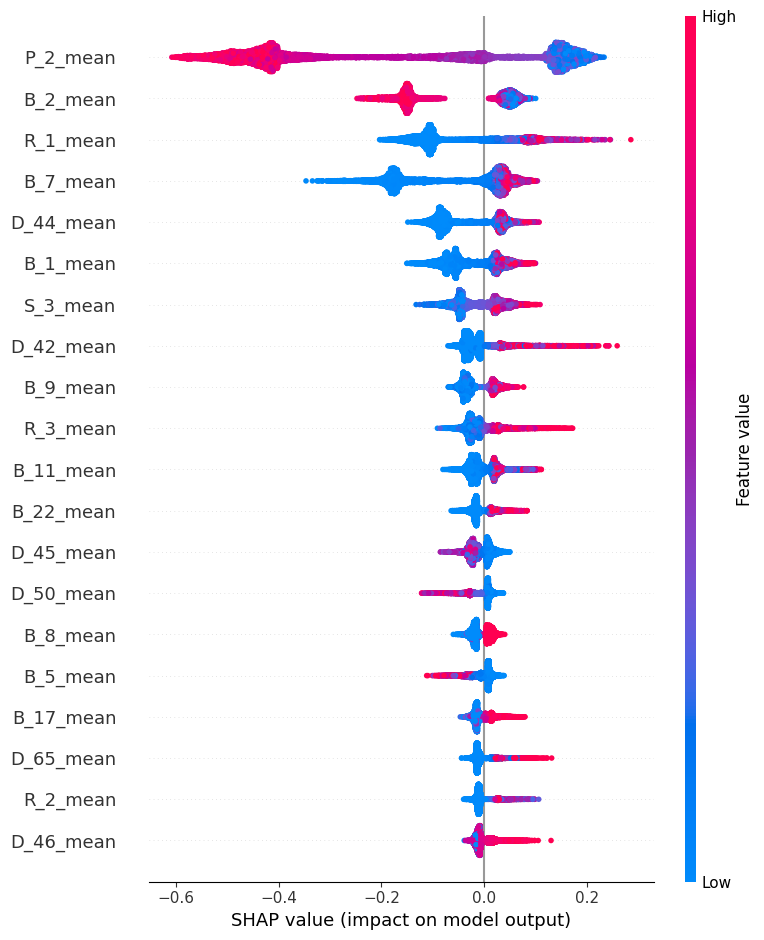

In [ ]:
#SHAP with beeswarm
explainer = shap.Explainer(final_model)
shap_values = explainer.shap_values(X_test_1)
shap.summary_plot(shap_values, X_test_1, show=False)
plt.show()


In [ ]:
train["Prediction"] = final_model.predict_proba(X_train)[:, 1]
train.to_csv("/content/drive/MyDrive/train_prediction_2.csv", columns=["Prediction"], index=False)
train

,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean,Prediction
customer_ID,,,,,,,,,,,,,,,,,,,,,
f0040db6c957c23a1a4f2910c0103be136411063c999237bab93b5a76195dd9e,0.0,0.997549,0.004968,0.005043,0.815356,0.004463,0.000000,0.005716,0.005374,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.469134
b65c2ae80ebe19b06adee07dc828c3be9430799106736c25dacb88be7bb42694,0.0,0.760419,0.024252,0.623612,0.550067,0.092076,0.163223,0.003237,0.066442,0.012174,...,0.333333,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.726209
bad44e4d183f513bc1ee36f51182dccfaf42b3f4d93f46e2c74905fb32fb015d,0.0,0.857177,0.245068,0.017320,0.989615,0.006169,0.183259,0.003663,0.005168,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.480487
3938aacddd3c38d237f4b78a5d5538e7c70ec3f9eb9a8aaf9c2d8b844975974b,0.0,0.643987,0.245181,0.150940,0.302830,0.235833,0.056641,0.241332,0.157309,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.760994
8eb1f5417df4839883c9ee643a12e5716ac3b62418134a78ec6300e78a9dd234,1.0,0.216859,0.004230,0.018160,0.815754,0.003998,0.193574,0.005106,0.004628,0.672173,...,0.250000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.807129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383dfd2624968e0b038be0a221d36d58f8f028191c829e603fc2025563815e18,0.0,0.729024,0.006633,0.005064,0.815961,0.004960,0.172572,0.005389,0.005527,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.499623
4e95ab24f99b2a4847ec088a53311d655d3cc6afd0885c72276a0b85ef5119ce,0.0,0.000000,0.025406,0.023011,0.953612,0.005369,0.000000,0.004781,0.008238,0.000000,...,0.000000,0.000000,0.272727,0.000000,0.0,1.000000,0.0,0.0,0.0,0.558085
0ee9e7483c9593018232a01ed8c812b194531952bf92f490d66b9a19a4149e0f,1.0,0.479795,0.139158,0.327950,0.037335,0.005644,0.170025,0.030086,0.444520,0.000000,...,1.000000,0.000000,0.000000,0.307692,0.0,0.692308,0.0,0.0,0.0,0.786555


#Step 17 Below

In [ ]:
#####STEP 17 - based on filtered_train for 0.75
#Filtered merged data to time for 6 months

# Convert the 'date_column' to a datetime format
merged_data['S_2'] = pd.to_datetime(merged_data['S_2'])

# Verify the data type of the 'date_column'
print(merged_data['S_2'].dtype)


#Filtered merged data to time for 6 months
###Use to change Date

from datetime import datetime
# Define the start date (April 2017)
start_date = datetime(2017, 11, 1)

# Get the current date
end_date = datetime(2018, 4, 30)

# Create a mask to filter dates within the specified range
date_mask = (merged_data['S_2'] >= start_date) & (merged_data['S_2'] <= end_date)

# Apply the mask and group by 'customer_ID'
filtered_df = merged_data[date_mask].groupby('customer_ID')


#Strategy 1 accept all with default probability -Train
#Strategy 2 accept all with default probability  - Train
condition_train = train["Prediction"] < 1
filtered_train = train[condition_train]
filtered_train

#total number of rows
num_rows_train = filtered_train.shape[0]
num_rows_train

#Total number of rows containing 1 (default)
count_of_ones_train = (filtered_train['target_mean'] == 1).sum()
count_of_ones_train

#Percentage of default based on train
percent_def_train = count_of_ones_train / num_rows_train*100
percent_def_train




#Merged
merged_df_avg = pd.merge(averages_6months, filtered_train, on='customer_ID')

#Select columns
merged_df_FINAL = merged_df_avg[["customer_ID","target_mean","Prediction","B_2","S_3"]]

merged_df_FINAL

# Initialize the table DataFrame
table = pd.DataFrame(columns=["Threshold", "#Total", "Default Rate", "Revenue"])

# Assuming you have merged_df_final defined already
row = 0
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    # Modify 'B_2' and 'S_3' columns based on the threshold
    B_2_modified = merged_df_FINAL.loc[merged_df_FINAL['Prediction'] <= threshold, 'B_2'] * 0.02
    S_3_modified = merged_df_FINAL.loc[merged_df_FINAL['Prediction'] <= threshold, 'S_3'] * 0.001
    # Calculate num_defaults based on the modified threshold
    num_defaults = len(merged_df_FINAL[merged_df_FINAL['Prediction'] <= threshold])
    # Calculate total_records
    total_records = len(merged_df_FINAL)
    # Calculate the number of '1's in "#Total" based on the modified threshold
    num_ones = len(merged_df_FINAL[(merged_df_FINAL['Prediction'] <= threshold) & (merged_df_FINAL['target_mean'] == 1)])
    # Calculate default_rate based on the number of '1's in "#Total" divided by the total count in "#Total"
    default_rate = (num_ones / total_records) * 100
    # Calculate revenue based on the modified threshold
    revenue = 12 * B_2_modified.sum() + 12 * S_3_modified.sum()
    # Add values to the table DataFrame
    table.loc[row, "Threshold"] = threshold
    table.loc[row, "#Total"] = num_defaults
    table.loc[row, "Default Rate"] = default_rate
    table.loc[row, "Revenue"] = revenue
    # Increment the row index
    row += 1

# Print the table
print(table)

In [ ]:
test_1["Prediction"] = final_model.predict_proba(X_test_1)[:, 1]
test_1

,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean,Prediction
customer_ID,,,,,,,,,,,,,,,,,,,,,
efb6927ab1c273b94f282308f2d95f4036fbe5376a187fb6154eb4ba1eec54d4,1.0,0.512624,0.074530,0.083888,0.279303,0.099976,0.128176,0.047501,0.149926,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.804305
1df92a01b0a90f073113ad63ef1103064fa41067012eb57a237eb083889e6e7c,0.0,0.956848,0.007851,0.004622,0.841787,0.005729,0.180709,0.005090,0.005308,0.008820,...,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.504029
a7165626175a116336598a3360eca11f6cf15a6995182282d9c9a76b0d284221,1.0,0.620352,0.625207,0.080071,0.610641,0.002117,0.134639,0.052888,0.007389,0.431349,...,0.000000,0.250000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.757099
72b6b987939d520ccb4559efdb469ef90cfa825b42714215931ee4125877ac80,0.0,0.926298,0.043102,0.022273,0.844925,0.003773,0.144260,0.004404,0.003810,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.490025
31d0d862bf40a75d7161c85cbae9ab9352e9a0e4efa43e7c1d3e51ba080c79d4,0.0,0.697643,0.171430,0.032602,0.943129,0.004917,0.231751,0.003130,0.007891,0.028091,...,0.833333,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.541567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b8f2d8caff9d774b638bda5ee36bbc317a53c97d5b12dea130c16080d4c5075e,0.0,0.732258,0.007633,0.032464,0.901297,0.005578,0.125481,0.005065,0.007509,0.000000,...,0.000000,0.076923,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.483665
f60604de0d79d18eafe2db3920f0b69dbf32f39206e63aec50c696e5b2bb6c8e,0.0,0.333332,0.123390,0.045622,0.274663,0.005739,0.200117,0.004375,0.006641,0.086960,...,0.000000,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.788658
da999d368669f99d757036d6ffa08c67452e6d8c672f9dcdee0428dcc6a3d950,0.0,0.811968,0.006647,0.006267,0.829173,0.003226,0.000000,0.005060,0.003645,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.470706


In [ ]:
test_1.to_csv('/content/drive/MyDrive/test_1_with_predictions.csv', index=False)

In [ ]:
#rudra
#Strategy 1 accept all with default probability below 0.81 (this can be the agressive strategy) - Test_1
#Strategy 2 accept all with default probability below 0.75 (this can be the conservative strategy) - Test_1
condition_test_1 = test_1["Prediction"] < 0.81
filtered_test_1 = test_1[condition_test_1]
filtered_test_1



,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean,Prediction
customer_ID,,,,,,,,,,,,,,,,,,,,,
efb6927ab1c273b94f282308f2d95f4036fbe5376a187fb6154eb4ba1eec54d4,1.0,0.512624,0.074530,0.083888,0.279303,0.099976,0.128176,0.047501,0.149926,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.804305
1df92a01b0a90f073113ad63ef1103064fa41067012eb57a237eb083889e6e7c,0.0,0.956848,0.007851,0.004622,0.841787,0.005729,0.180709,0.005090,0.005308,0.008820,...,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.504029
a7165626175a116336598a3360eca11f6cf15a6995182282d9c9a76b0d284221,1.0,0.620352,0.625207,0.080071,0.610641,0.002117,0.134639,0.052888,0.007389,0.431349,...,0.000000,0.250000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.757099
72b6b987939d520ccb4559efdb469ef90cfa825b42714215931ee4125877ac80,0.0,0.926298,0.043102,0.022273,0.844925,0.003773,0.144260,0.004404,0.003810,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.490025
31d0d862bf40a75d7161c85cbae9ab9352e9a0e4efa43e7c1d3e51ba080c79d4,0.0,0.697643,0.171430,0.032602,0.943129,0.004917,0.231751,0.003130,0.007891,0.028091,...,0.833333,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.541567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13dbef31e3f85a7c17b15454d7ac07ea62372940fcd507687238c031809bb942,0.0,0.838271,0.005131,0.027609,0.650772,0.017756,0.178362,0.004605,0.103436,0.000000,...,0.461538,0.307692,0.230769,0.0,1.0,0.0,0.0,0.0,0.0,0.520151
b8f2d8caff9d774b638bda5ee36bbc317a53c97d5b12dea130c16080d4c5075e,0.0,0.732258,0.007633,0.032464,0.901297,0.005578,0.125481,0.005065,0.007509,0.000000,...,0.000000,0.076923,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.483665
f60604de0d79d18eafe2db3920f0b69dbf32f39206e63aec50c696e5b2bb6c8e,0.0,0.333332,0.123390,0.045622,0.274663,0.005739,0.200117,0.004375,0.006641,0.086960,...,0.000000,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.788658


In [ ]:
#total number of rows
num_rows_test1 = filtered_test_1.shape[0]
num_rows_test1



10495

In [ ]:
#Total number of rows containing 1 (default)
count_of_ones_test1 = (filtered_test_1['target_mean'] == 1).sum()
count_of_ones_test1



993

In [ ]:
#Percentage of default based on train
percent_def_test1 = count_of_ones_test1 / num_rows_test1*100
percent_def_test1

9.461648404001906

In [ ]:
test_2["Prediction"] = final_model.predict_proba(X_test_2)[:, 1]
test_2

,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean,Prediction
customer_ID,,,,,,,,,,,,,,,,,,,,,
e1d6ca15f1eb77edff32e471a9753152b9d117e0bd73070aec99628341c45c30,0.0,0.622691,0.080134,0.523949,0.036818,0.003891,0.033377,0.004471,0.363009,0.000000,...,0.076923,0.000000,0.923077,0.0,1.0,0.0,0.0,0.0,0.0,0.756319
2f1360db3f46fc8b982c49c981e9bd8594ea14ec915c596aa68396b534dd1303,0.0,0.583067,0.298091,0.332689,0.070819,0.043156,0.128512,0.005572,0.220686,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.773801
57a658af1ef7f1dab395f0ea68b11d1e3b4eeb9da3d3ffb94b54c2d5ea1d5929,1.0,0.363239,0.170418,0.114028,0.525700,0.169667,0.514326,0.005313,0.006104,0.331778,...,0.333333,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.839921
b2b9ccd6d6a1e2c3e527c9329f63976bd3551cdb8cc1cf7355bf6abdf63672f4,0.0,0.561949,0.029893,0.207378,0.115713,0.312704,0.134001,0.005601,0.176110,0.000000,...,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.798164
ec2d648570b7d81ca8e7d6dd4de99fe293f6121fbc3dd3c3cd601c3fe14867f7,0.0,0.519171,0.005230,0.005043,0.815224,0.063763,0.000000,0.004216,0.003815,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.613414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564939c93db0869108e0b26b6498b95a1495a7aa39a6d4c658a35119228c86c3,1.0,0.614756,0.136663,0.014113,0.753732,0.004689,0.339750,0.003719,0.073107,0.000000,...,0.000000,0.153846,0.846154,0.0,0.0,1.0,0.0,0.0,0.0,0.691313
4b32eb8047a0b8c1fab01df911974f99494d67d86d191723ab174dbeb09e6e8d,0.0,0.675243,0.207588,0.024712,0.947800,0.005791,0.144651,0.004599,0.004825,0.000000,...,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.521915
004fa291349bd6bb8d5fe72c13efa57031ca5e0d079ffdac325d2e7099f61303,0.0,0.649809,0.005774,0.006939,0.815085,0.004035,0.000000,0.004178,0.004853,0.000000,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.487641


In [ ]:
#rudra
#Strategy 1 accept all with default probability below 0.81 (this can be the agressive strategy) - Test_2
#Strategy 2 accept all with default probability below 0.75 (this can be the conservative strategy) - Test_2
condition_test_2 = test_2["Prediction"] < 0.81
filtered_test_2 = test_2[condition_test_2]
filtered_test_2





,target_mean,P_2_mean,D_39_mean,B_1_mean,B_2_mean,R_1_mean,S_3_mean,D_41_mean,B_3_mean,D_42_mean,...,O_mean,R_mean,U_mean,CL_mean,CO_mean,CR_mean,XL_mean,XM_mean,XZ_mean,Prediction
customer_ID,,,,,,,,,,,,,,,,,,,,,
e1d6ca15f1eb77edff32e471a9753152b9d117e0bd73070aec99628341c45c30,0.0,0.622691,0.080134,0.523949,0.036818,0.003891,0.033377,0.004471,0.363009,0.0,...,0.076923,0.000000,0.923077,0.0,1.0,0.0,0.0,0.0,0.0,0.756319
2f1360db3f46fc8b982c49c981e9bd8594ea14ec915c596aa68396b534dd1303,0.0,0.583067,0.298091,0.332689,0.070819,0.043156,0.128512,0.005572,0.220686,0.0,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.773801
b2b9ccd6d6a1e2c3e527c9329f63976bd3551cdb8cc1cf7355bf6abdf63672f4,0.0,0.561949,0.029893,0.207378,0.115713,0.312704,0.134001,0.005601,0.176110,0.0,...,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.798164
ec2d648570b7d81ca8e7d6dd4de99fe293f6121fbc3dd3c3cd601c3fe14867f7,0.0,0.519171,0.005230,0.005043,0.815224,0.063763,0.000000,0.004216,0.003815,0.0,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.613414
fa1e5c0871ca3f0564ba97e94129032c3a2a7c887c9b11d5990d01cb22fc1e00,0.0,0.572310,0.075299,0.241693,0.026260,0.082015,0.151124,0.004589,0.690971,0.0,...,0.000000,0.692308,0.307692,0.0,1.0,0.0,0.0,0.0,0.0,0.798407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f3744405c44314873dfcfd63be9b616c9f3a57ed91ab6b851b2a556f3c91de8e,0.0,0.923518,0.149562,0.030459,0.830872,0.004059,0.128302,0.071571,0.014002,0.0,...,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.476559
564939c93db0869108e0b26b6498b95a1495a7aa39a6d4c658a35119228c86c3,1.0,0.614756,0.136663,0.014113,0.753732,0.004689,0.339750,0.003719,0.073107,0.0,...,0.000000,0.153846,0.846154,0.0,0.0,1.0,0.0,0.0,0.0,0.691313
4b32eb8047a0b8c1fab01df911974f99494d67d86d191723ab174dbeb09e6e8d,0.0,0.675243,0.207588,0.024712,0.947800,0.005791,0.144651,0.004599,0.004825,0.0,...,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.521915


In [ ]:
#total number of rows
num_rows_test2 = filtered_test_2.shape[0]
num_rows_test2



10494

In [ ]:
#Total number of rows containing 1 (default)
count_of_ones_test2 = (filtered_test_2['target_mean'] == 1).sum()
count_of_ones_test2


994

In [ ]:

#Percentage of default based on train
percent_def_test2 = count_of_ones_test2 / num_rows_test2*100
percent_def_test2

9.472079283400038

<Axes: xlabel='Score Bins'>

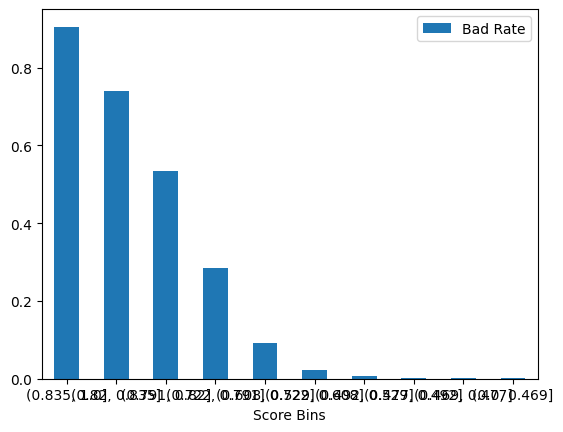

In [ ]:
# Rank Ordering
quantiles = list(set(train.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


train["Score Bins"] = pd.cut(train["Prediction"], quantiles)
stat = train.groupby("Score Bins")["target_mean"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

#plt.bar(stat["Bad Rate"], color ='maroon',
 #       width = 0.4)

stat.plot.bar(y='Bad Rate', rot=0)

<Axes: xlabel='Score Bins'>

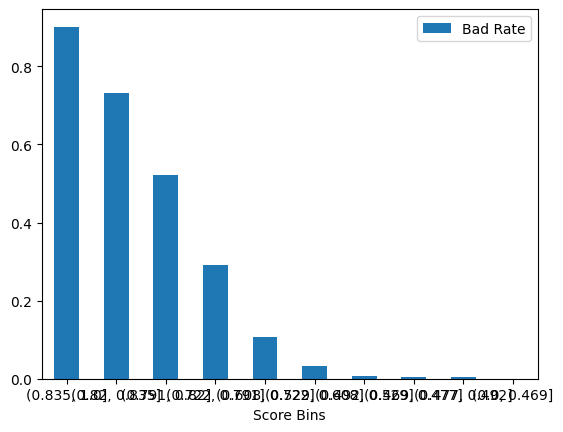

In [ ]:
#Spliet this into test #1 and Test#2
test_1["Prediction"] = final_model.predict_proba(X_test_1)[:, 1]

test_1["Score Bins"] = pd.cut(test_1["Prediction"], quantiles)
stat = test_1.groupby("Score Bins")["target_mean"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

stat.plot.bar(y='Bad Rate', rot=0)

<Axes: xlabel='Score Bins'>

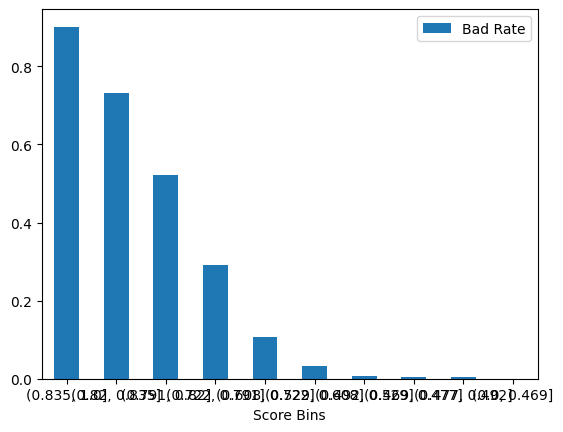

In [ ]:
#Split into test 1 and test #2

test_2["Prediction"] = final_model.predict_proba(X_test_2)[:, 1]

test_2["Score Bins"] = pd.cut(test_2["Prediction"], quantiles)
stat = test_1.groupby("Score Bins")["target_mean"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

stat.plot.bar(y='Bad Rate', rot=0)

#Neural Network Begins

In [ ]:
#Outlier Treatment
# Define the percentile thresholds for outlier treatment
lower_percentile = 1
upper_percentile = 99

# Loop through all columns of the DataFrame 'train'
for column in train.columns:
    # Calculate the lower and upper percentile values
    lower_threshold = np.nanpercentile(train[column], lower_percentile)
    upper_threshold = np.nanpercentile(train[column], upper_percentile)

    # Replace values below the lower threshold with the lower_threshold
    train.loc[train[column] < lower_threshold, column] = lower_threshold

    # Replace values above the upper threshold with the upper_threshold
    train.loc[train[column] > upper_threshold, column] = upper_threshold

In [ ]:
# check
print (train.dtypes[train.dtypes == "object"])
print (test.dtypes[test.dtypes == "object"])

Series([], dtype: object)
Series([], dtype: object)


#Missing value imputation

In [ ]:
X_train.fillna(0,inplace=True)
X_test_1.fillna(0,inplace=True)
X_test_2.fillna(0,inplace=True)
Y_train.fillna(0,inplace=True)
Y_test_1.fillna(0,inplace=True)
Y_test_2.fillna(0,inplace=True)

In [ ]:
#check for missing values
print (train[train.isnull()].shape)

(64248, 190)


In [ ]:
train.fillna(0,inplace=True)
test_1.fillna(0,inplace=True)
test_2.fillna(0,inplace=True)

In [ ]:
#StandardScaler for normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train)

In [ ]:
# check if there is any observation with Target missing
print (train[train["target_mean"].isnull()].shape)
print (test_1[test_1["target_mean"].isnull()].shape)
print (test_2[test_2["target_mean"].isnull()].shape)

(0, 190)
(0, 190)
(0, 190)


In [ ]:
#check final feature nos
print (X_train.shape)
print (X_test_1.shape)
print (X_test_2.shape)

(64248, 27)
(13767, 27)
(13768, 27)


In [ ]:
#Missing Value Imputation
train.fillna(0,inplace=True)
test_1.fillna(0,inplace=True)
test_2.fillna(0,inplace=True)

In [ ]:
#grid search
!pip install tensorflow


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
pip install keras

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

# add the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'relu'))

# add the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'relu'))

# add the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

# add additional parameters
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
classifier.fit(X_train,Y_train,batch_size=1000,epochs=20)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_1, classifier.predict(X_test_1))
roc_auc_score(Y_test_2, classifier.predict(X_test_2))
roc_auc_score(Y_train, classifier.predict(X_train))

#Grid search NN

In [ ]:
#Next steps
#form the table from grid search
#print and save the table

# Here we do grid search on #nodes in each layer, activation function, and batch size, and look at the AUC as performance metric.

table = pd.DataFrame(columns = ["Num Nodes", "Activation Function", "Batch Size", "AUC Train", "AUC Test",
                                "Top 5% RR Train", "Top 5% RR Test", "Top 10% RR Train", "Top 10% RR Test", "Top 20% RR Train", "Top 20% RR Test" ])

row = 0
for num_nodes in [4, 6 10]:
  for activation in ['relu', 'sigmoid']:
    for batch_size in [100, 1000, 10000]:
      classifier = Sequential()
      classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',
                    activation = activation))
      classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',
                activation = activation))
      classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))
      classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])
      classifier.fit(X_train,Y_train,batch_size=batch_size,epochs=20,verbose=0)

      train_data = train.copy()
      train_data["prediction"] = classifier.predict(X_train)

      test_data = test.copy()
      test_data["prediction"] = classifier.predict(X_test)

      table.loc[row,"Num Nodes"] = num_nodes
      table.loc[row,"Activation Function"] = activation
      table.loc[row,"Batch Size"] = batch_size
      table.loc[row,"AUC Train"] = roc_auc_score(Y_train, train_data["prediction"])
      table.loc[row,"AUC Test"] = roc_auc_score(Y_test, test_data["prediction"])

      table.loc[row,"Top 5% RR Train"] = train_data[train_data.prediction < 0.05]["30+ Delinquent"].sum() / train_data[train_data.prediction < 0.05]["30+ Delinquent"].count()
      table.loc[row,"Top 5% RR Test"] = test_data[test_data.prediction < 0.05]["30+ Delinquent"].sum() / test_data[test_data.prediction < 0.05]["30+ Delinquent"].count()
      table.loc[row,"Top 10% RR Train"] = train_data[train_data.prediction < 0.1]["30+ Delinquent"].sum() / train_data[train_data.prediction < 0.1]["30+ Delinquent"].count()
      table.loc[row,"Top 10% RR Test"] = test_data[test_data.prediction < 0.1]["30+ Delinquent"].sum() / test_data[test_data.prediction < 0.1]["30+ Delinquent"].count()
      table.loc[row,"Top 20% RR Train"] = train_data[train_data.prediction < 0.2]["30+ Delinquent"].sum() / train_data[train_data.prediction < 0.2]["30+ Delinquent"].count()
      table.loc[row,"Top 20% RR Test"] = test_data[test_data.prediction < 0.2]["30+ Delinquent"].sum() / test_data[test_data.prediction < 0.2]["30+ Delinquent"].count()

      row = row + 1

table.to_csv("drive/My Drive/NN_results.csv")



In [ ]:
#grid search NN
from tensorflow.keras.layers import Dense, Dropout
table = pd.DataFrame(columns=["Num Nodes", "Num Hidden Layers", "Activation Function", "Batch Size", "Dropout", "AUC Train", "AUC Test",
                             "Top 5% RR Train", "Top 5% RR Test", "Top 10% RR Train", "Top 10% RR Test", "Top 20% RR Train", "Top 20% RR Test"])

row = 0

for num_nodes in [4, 6]:
    for num_hidden_layers in [2, 4]:  # Added hidden layers
        for activation in ['relu', 'tanh']:
            for batch_size in [100, 10000]:
                for dropout in [0.5, 0.99]:# Added dropout regularization

                    classifier = Sequential()
                    classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',
                                         activation=activation))
                    for _ in range(num_hidden_layers - 1):
                        classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',
                                             activation=activation))
                        classifier.add(Dropout(dropout))  # Add dropout regularization

                    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',
                                         activation='tanh'))
                    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'FalseNegatives'])
                    classifier.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

                    train_data = train.copy()
                    train_data["prediction"] = classifier.predict(X_train)

                    test_data1 = test_1.copy()
                    test_data1["prediction"] = classifier.predict(X_test_1)

                    test_data2 = test_2.copy()
                    test_data2["prediction"] = classifier.predict(X_test_2)

                    table.loc[row, "Num Nodes"] = num_nodes
                    table.loc[row, "Num Hidden Layers"] = num_hidden_layers
                    table.loc[row, "Activation Function"] = activation
                    table.loc[row, "Batch Size"] = batch_size
                    table.loc[row, "Dropout"] = dropout
                    table.loc[row, "AUC Train"] = roc_auc_score(Y_train, train_data["prediction"])
                    table.loc[row, "AUC Test1"] = roc_auc_score(Y_test_1, test_data1["prediction"])
                    table.loc[row, "AUC Test2"] = roc_auc_score(Y_test_2, test_data2["prediction"])

                    table.loc[row, "Top 5% RR Train"] = train_data[train_data.prediction < 0.05]["target_mean"].sum() / \
                                                      train_data[train_data.prediction < 0.05]["target_mean"].count()
                    table.loc[row, "Top 5% RR Test"] = test_data1[test_data1.prediction < 0.05]["target_mean"].sum() / \
                                                     test_data1[test_data1.prediction < 0.05]["target_mean"].count()
                    table.loc[row, "Top 5% RR Test"] = test_data2[test_data2.prediction < 0.05]["target_mean"].sum() / \
                                                     test_data2[test_data2.prediction < 0.05]["target_mean"].count()
                    table.loc[row, "Top 10% RR Train"] = train_data[train_data.prediction < 0.1]["target_mean"].sum() / \
                                                       train_data[train_data.prediction < 0.1]["target_mean"].count()
                    table.loc[row, "Top 10% RR Test"] = test_data1[test_data1.prediction < 0.1]["target_mean"].sum() / \
                                                      test_data1[test_data1.prediction < 0.1]["target_mean"].count()
                    table.loc[row, "Top 10% RR Test"] = test_data2[test_data2.prediction < 0.1]["target_mean"].sum() / \
                                                      test_data2[test_data2.prediction < 0.1]["target_mean"].count()
                    table.loc[row, "Top 20% RR Train"] = train_data[train_data.prediction < 0.2]["target_mean"].sum() / \
                                                       train_data[train_data.prediction < 0.2]["target_mean"].count()
                    table.loc[row, "Top 20% RR Test"] = test_data1[test_data1.prediction < 0.2]["target_mean"].sum() / \
                                                      test_data1[test_data1.prediction < 0.2]["target_mean"].count()
                    table.loc[row, "Top 20% RR Test"] = test_data2[test_data2.prediction < 0.2]["target_mean"].sum() / \
                                                      test_data2[test_data2.prediction < 0.2]["target_mean"].count()

                    row = row + 1


In [ ]:
table

In [ ]:
table.to_csv("/content/drive/MyDrive/NN_results.csv")

In [ ]:
#final model selection. Model no.16

classifier = Sequential()

# add the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
classifier.add(Dropout(0.5))
# add the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'relu'))
classifier.add(Dropout(0.5))

# add the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'relu'))

# add additional parameters
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
classifier.fit(X_train,Y_train,batch_size=100,epochs=20)



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_1, classifier.predict(X_test_1))
#roc_auc_score(Y_test_2, classifier.predict(X_test_2))
#roc_auc_score(Y_train, classifier.predict(X_train))

In [ ]:
roc_auc_score(Y_test_2, classifier.predict(X_test_2))

In [ ]:
classifier.predict(X_test_2)

In [ ]:
classifier.predict(X_test_1)

In [ ]:
classifier.predict(X_train)

In [ ]:
roc_auc_score(Y_train, classifier.predict(X_train))

In [ ]:
table

In [ ]:
#check ranking order
# Rank Ordering
quantiles = list(set(train.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


train["Score Bins"] = pd.cut(train["Prediction"], quantiles)
stat = train.groupby("Score Bins")["target_mean"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

#plt.bar(stat["Bad Rate"], color ='maroon',
 #       width = 0.4)

stat.plot.bar(y='Bad Rate', rot=0)

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(y=table.loc[:,'AUC
Test2']), x= table.loc[:,'AUC Train']

In [ ]:
table.loc[:,'AUC Test2']


In [ ]:
table.loc[:,'AUC Train']